In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fitlib
import mplhep
import uproot
import vector
mplhep.style.use(mplhep.style.LHCb2)

In [2]:
%load_ext autoreload
%autoreload 2

In [6]:
Dp_M = np.fromfile('data/kpipi_cut')

In [7]:
tanh_dp = fitlib.Convolution([0], 1869.65, 1)
Dp_data = np.loadtxt("./data/Dp_histogram.csv", delimiter=",", skiprows=1)
tanh_dp.d_x = Dp_data[:, 0]
tanh_dp.c = Dp_data[:, 1]

In [8]:
conv_kkp = fitlib.Fitter.binned(Dp_M,200, range=(1790,1970))
conv_kkp.mu = fitlib.f(1850,1900)
conv_kkp.pdf = [
    tanh_dp.pdf(mu=conv_kkp.mu), tanh_dp.pdf(mu=conv_kkp.mu),
    fitlib.Exp(x0=1790)
]
conv_kkp.chi2(100000)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 7405                       │              Nfcn = 690              │
│ EDM = 1.32e-05 (Goal: 0.0002)    │            time = 7.4 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │  2.348e6  │  0.035e6  │            │            │    1    │         │       │
│ 1 │ x1   │1.8692945e3│0.0000025e3│            │            │  1850   │  1900   │       │
│ 2 │ x2   │  10.717   │   0.033   │            │            │    0    │         │       │
│ 3 │ x3   │  7.64e6   │  0.04e6   │            │            │    1    │         │       │
│ 4 │ x4   │   6.779   │   0.010   │            │            │    0    │         │       │
│ 5 │ x5   │  163.4e3  │   0.8e3   │            │            │    0    │         │       │
│ 6 │ x6   │  1.790e3  │  0.018e3  │            │            │         │         │  yes  │
│ 7 │ x7   │   119.6   │    0.9    │            │            │    0    │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│    │           x0           x1           x2           x3           x4           x5           x6           x7 │
├────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ x0 │     1.25e+09   144.047e-3 -1.1442072e3       -1.3e9   -321.71630        6.3e6            0     1.8729e3 │
│ x1 │   144.047e-3     6.33e-06        -2e-6  -181.044e-3        -0e-6     9.595e-3         0e-6       -65e-6 │
│ x2 │ -1.1442072e3        -2e-6      0.00112  1.1490023e3      0.28e-3      -7.3204       0.0000      -0.0019 │
│ x3 │       -1.3e9  -181.044e-3  1.1490023e3     1.26e+09    322.64735       -6.5e6            0    -1.8080e3 │
│ x4 │   -321.71630        -0e-6      0.28e-3    322.64735     9.07e-05     -1.45382            0     -0.43e-3 │
│ x5 │        6.3e6     9.595e-3      -7.3204       -6.5e6     -1.45382     7.08e+05            0        395.1 │
│ x6 │            0         0e-6       0.0000            0            0            0            0          0.0 │
│ x7 │     1.8729e3       -65e-6      -0.0019    -1.8080e3     -0.43e-3        395.1          0.0        0.815 │
└────┴─────────────────────────────────────────────────────────────────────────────────────────────────────────┘

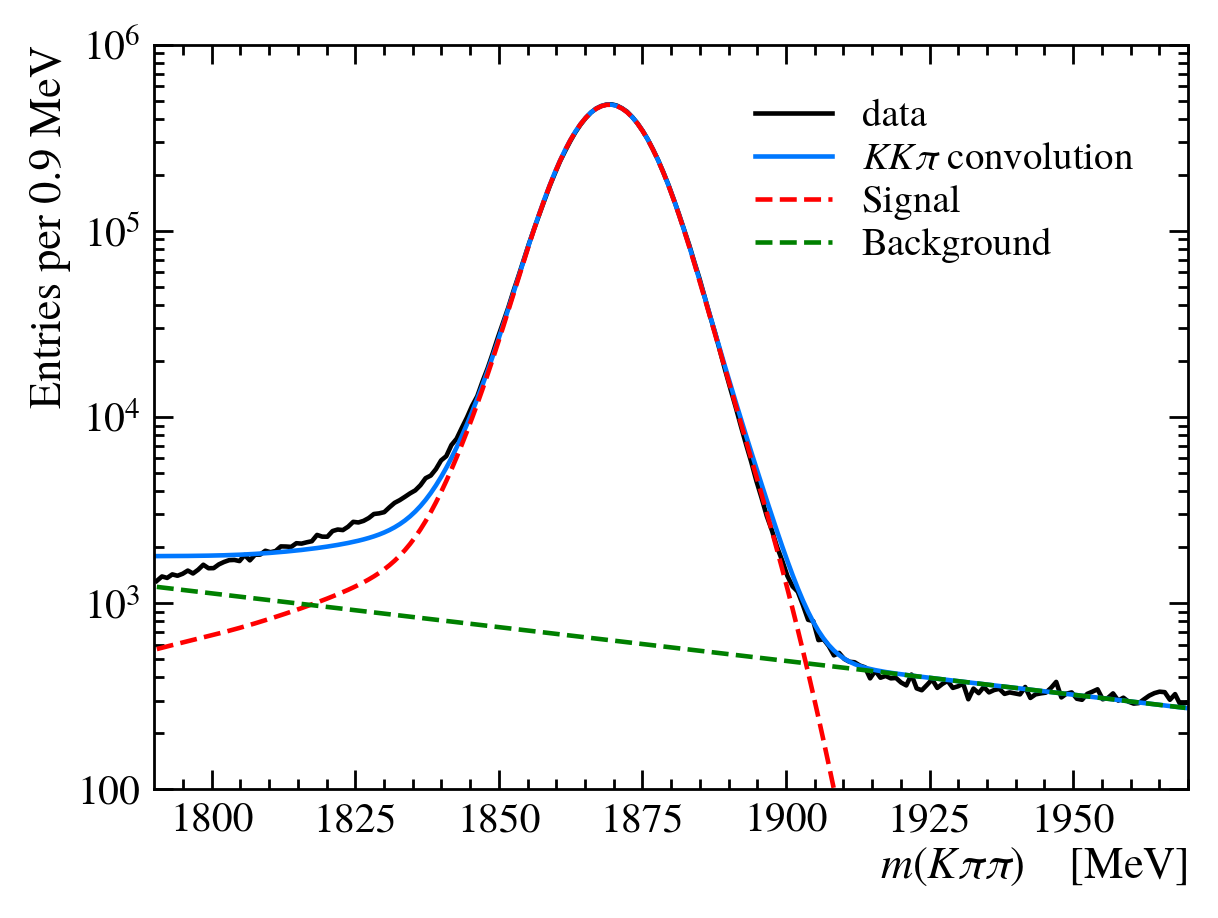

In [21]:
plt.plot(conv_kkp.x, conv_kkp.y, color='black', label='data')
plt.plot(conv_kkp.x,conv_kkp.gen_y(conv_kkp.x), label='$KK\pi$ convolution')
plt.plot(conv_kkp.x,conv_kkp.pdf[0].call(conv_kkp.x)*0.9+conv_kkp.pdf[1].call(conv_kkp.x)*0.9, linestyle='--',color='red', label='Signal')
plt.plot(conv_kkp.x,conv_kkp.pdf[2].call(conv_kkp.x)*0.9, linestyle='--',color='green', label='Background')
#plt.plot(tanh1.x,tanh1.gen_y(tanh1.x), color='red', label='$K\pi\pi$ convolution')
plt.yscale('log')
plt.axis([1790,1970, 100,10**6])
plt.xlabel('$m(K \pi \pi)$    [MeV]')
plt.ylabel('Entries per 0.9 MeV')
plt.legend()
plt.show()

In [3]:
kpipi_tree=uproot.open("data/kpp_tree.root")["Truth"]["t"]

In [4]:
kpipi_K_TRUEP_E = np.asarray(kpipi_tree["K_TRUEP_E"])
kpipi_K_TRUEP_X = np.asarray(kpipi_tree["K_TRUEP_X"])
kpipi_K_TRUEP_Y = np.asarray(kpipi_tree["K_TRUEP_Y"])
kpipi_K_TRUEP_Z = np.asarray(kpipi_tree["K_TRUEP_Z"])

kpipi_pi1_TRUEP_E = np.asarray(kpipi_tree["pi1_TRUEP_E"])
kpipi_pi1_TRUEP_X = np.asarray(kpipi_tree["pi1_TRUEP_X"])
kpipi_pi1_TRUEP_Y = np.asarray(kpipi_tree["pi1_TRUEP_Y"])
kpipi_pi1_TRUEP_Z = np.asarray(kpipi_tree["pi1_TRUEP_Z"])

kpipi_pi2_TRUEP_E = np.asarray(kpipi_tree["pi2_TRUEP_E"])
kpipi_pi2_TRUEP_X = np.asarray(kpipi_tree["pi2_TRUEP_X"])
kpipi_pi2_TRUEP_Y = np.asarray(kpipi_tree["pi2_TRUEP_Y"])
kpipi_pi2_TRUEP_Z = np.asarray(kpipi_tree["pi2_TRUEP_Z"])
kpipi_TRUEP_E = np.asarray(kpipi_tree["Dp_TRUEP_E"])
kpipi_TRUEP_X = np.asarray(kpipi_tree["Dp_TRUEP_X"])
kpipi_TRUEP_Y = np.asarray(kpipi_tree["Dp_TRUEP_Y"])
kpipi_TRUEP_Z = np.asarray(kpipi_tree["Dp_TRUEP_Z"])

kpipi_K_vec   = vector.array({"px": kpipi_K_TRUEP_X, "py":kpipi_K_TRUEP_Y, "pz":kpipi_K_TRUEP_Z, "E":kpipi_K_TRUEP_E})
kpipi_pi1_vec   = vector.array({"px": kpipi_pi1_TRUEP_X, "py":kpipi_pi1_TRUEP_Y, "pz":kpipi_pi1_TRUEP_Z, "E":kpipi_pi1_TRUEP_E})
kpipi_pi2_vec  = vector.array({"px": kpipi_pi2_TRUEP_X, "py":kpipi_pi2_TRUEP_Y, "pz":kpipi_pi2_TRUEP_Z, "E":kpipi_pi2_TRUEP_E})
kpipi_true_vec  = vector.array({"px": kpipi_TRUEP_X, "py":kpipi_TRUEP_Y, "pz":kpipi_TRUEP_Z, "E":kpipi_TRUEP_E})
kpipi_mother_vec = kpipi_K_vec + kpipi_pi1_vec + kpipi_pi2_vec
kpipi_mother_mass = kpipi_mother_vec.mass
kpipi_true_mass = kpipi_true_vec.mass

In [15]:
Dp_mother_mass = np.fromfile('data/Dp_mother_mass')

In [54]:
import matplotlib

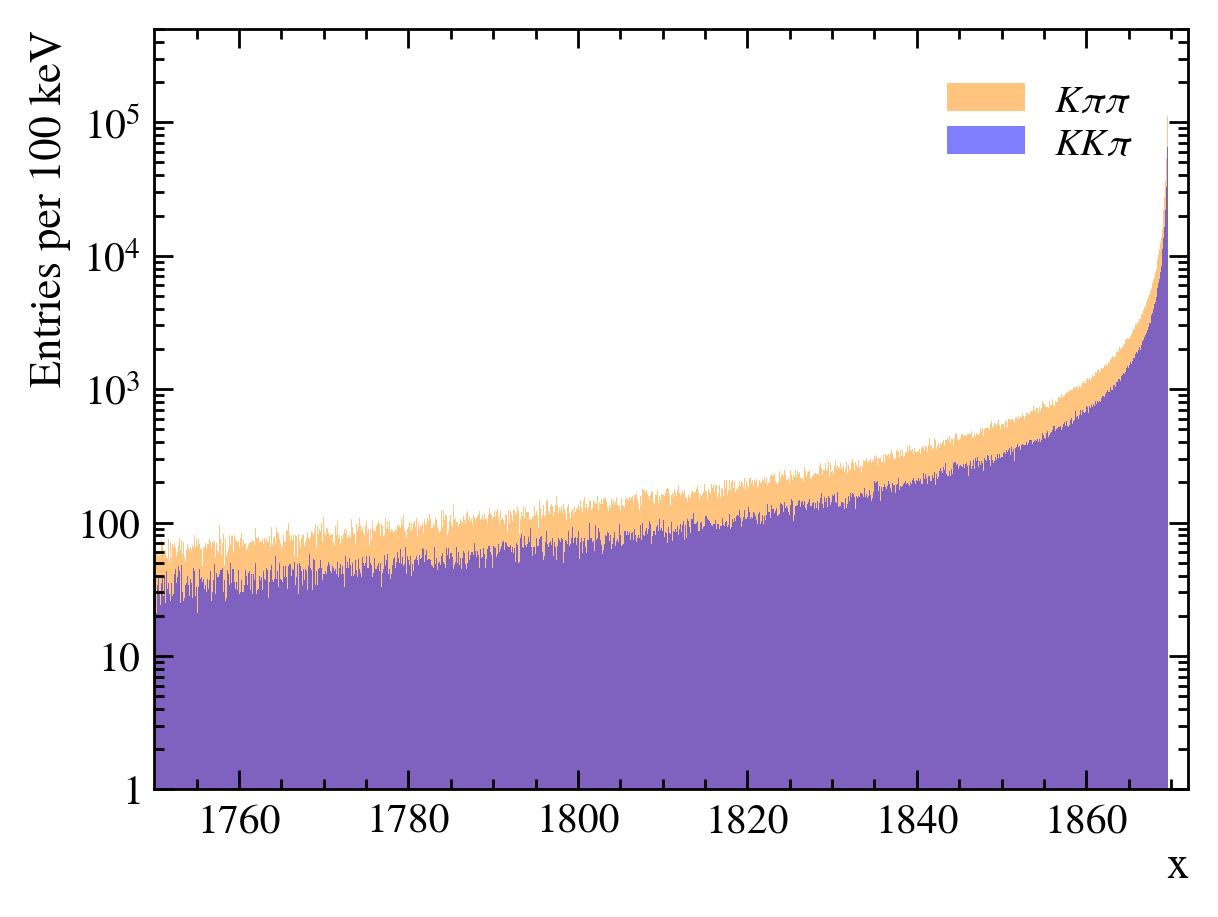

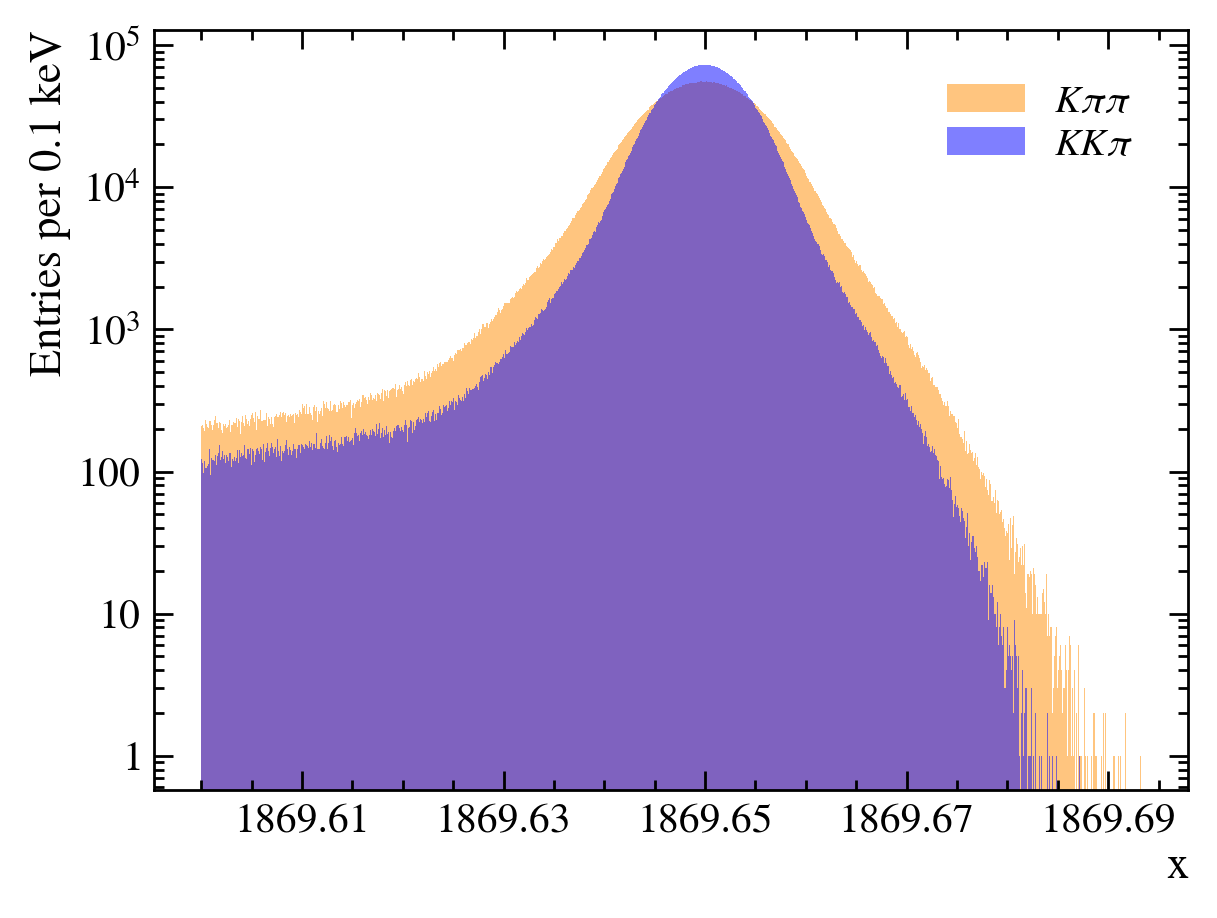

In [56]:
x=np.linspace(-5,5,1000)
fig, ax1 = plt.subplots()


ax1.hist(kpipi_mother_mass, bins=1200, range=(1750,np.max(kpipi_mother_mass)),color='darkorange',alpha=0.5, label='$K\pi\pi$')
ax1.hist(Dp_mother_mass, bins=1200, range=(1750,np.max(Dp_mother_mass)),color='blue',alpha=0.5, label='$KK\pi$')
ax1.axis([1750,1872,1,5*10**5])
ax1.set(xlabel='x',ylabel='Entries per 100 keV', yscale='log')
ax1.legend()
fig.show()

fig, ax2 = plt.subplots()

ax2.hist(kpipi_mother_mass, bins=1000, range=(1869.6,np.max(kpipi_mother_mass)),color='darkorange',alpha=0.5, label='$K\pi\pi$')
ax2.hist(Dp_mother_mass, bins=1000, range=(1869.6,np.max(Dp_mother_mass)),color='blue',alpha=0.5, label='$KK\pi$')
ax2.set(xlabel='x', ylabel='Entries per 0.1 keV', yscale='log', xticks=[1869.61,1869.63,1869.65,1869.67,1869.69])
ax2.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(float(x))))
ax2.legend()
fig.show()

In [11]:
tanh_kpp = fitlib.Convolution(kpipi_mother_mass, 1870.65, fitlib.Convolution.tanh_bin(1200, 1750, np.max(kpipi_mother_mass), 100,0.0001))

In [21]:
import pandas as pd
pd.DataFrame(tanh_kpp.c, tanh_kpp.d_x).to_csv('data/kpp_histogram.csv')

In [17]:
conv1 = fitlib.Fitter.binned(Dp_M, range=(1790,1970), bins=200)

conv1.mu = fitlib.f(1840,1900)


conv1.pdf=[
    tanh_kpp.pdf(mu=conv1.mu, sigma=fitlib.f(1,8,40)),
    tanh_kpp.pdf(mu=conv1.mu,sigma=fitlib.f(1,5,40)),
    
    fitlib.Exp(n=fitlib.f(0,10000,np.inf), x0=1790, a=fitlib.f(0.0001,300,np.inf))
]
conv1.chi2(10000000)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1141                       │              Nfcn = 827              │
│ EDM = 5.89e-06 (Goal: 0.0002)    │            time = 6.3 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │  2.33e6   │  0.04e6   │            │            │    1    │         │       │
│ 1 │ x1   │1.8703945e3│0.0000025e3│            │            │  1840   │  1900   │       │
│ 2 │ x2   │   10.55   │   0.04    │            │            │    1    │   40    │       │
│ 3 │ x3   │  7.71e6   │  0.04e6   │            │            │    1    │         │       │
│ 4 │ x4   │   6.771   │   0.010   │            │            │    1    │   40    │       │
│ 5 │ x5   │  0.284e6  │  0.013e6  │            │            │    0    │         │       │
│ 6 │ x6   │  1.790e3  │  0.018e3  │            │            │         │         │  yes  │
│ 7 │ x7   │    564    │    34     │            │            │ 0.0001  │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│    │           x0           x1           x2           x3           x4           x5           x6           x7 │
├────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ x0 │     1.63e+09   649.913e-3 -1.4420610e3       -1.6e9   -398.75717      -0.04e9            0     -138.0e3 │
│ x1 │   649.913e-3     6.34e-06        -2e-6  -693.740e-3        -0e-6    -1.237473         0e-6    -3.273e-3 │
│ x2 │ -1.4420610e3        -2e-6      0.00135  1.4480763e3      0.34e-3      48.8370       0.0000       0.1659 │
│ x3 │       -1.6e9  -693.740e-3  1.4480763e3     1.65e+09    399.93461       0.04e9            0      150.6e3 │
│ x4 │   -398.75717        -0e-6      0.34e-3    399.93461     0.000106      8.85244            0     30.82e-3 │
│ x5 │      -0.04e9    -1.237473      48.8370       0.04e9      8.85244      1.8e+08            0      457.9e3 │
│ x6 │            0         0e-6       0.0000            0            0            0            0            0 │
│ x7 │     -138.0e3    -3.273e-3       0.1659      150.6e3     30.82e-3      457.9e3            0     1.18e+03 │
└────┴─────────────────────────────────────────────────────────────────────────────────────────────────────────┘

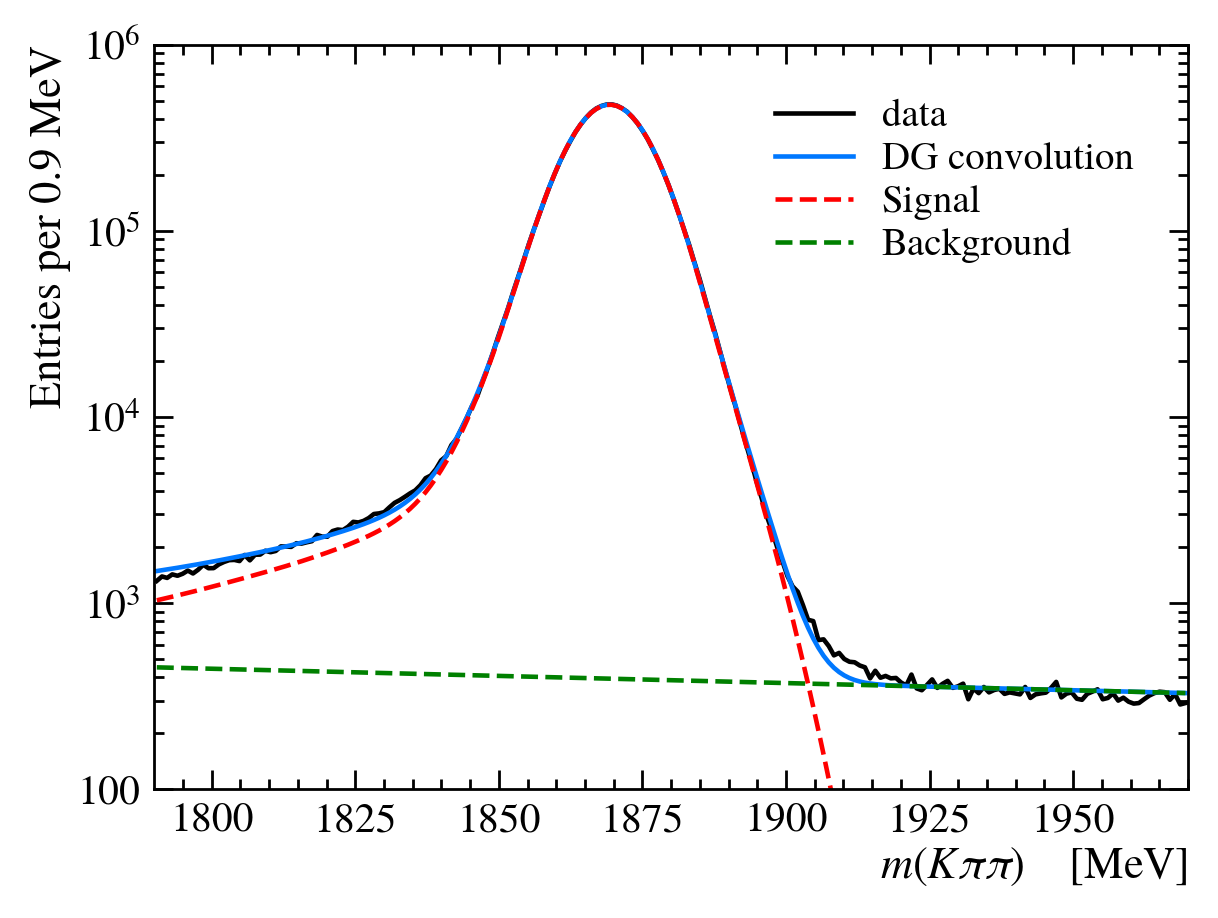

In [22]:
plt.plot(conv1.x, conv1.y, color='black', label='data')
plt.plot(conv1.x,conv1.gen_y(conv1.x), label='DG convolution')
plt.plot(conv1.x,conv1.pdf[0].call(conv1.x)*0.9+conv1.pdf[1].call(conv1.x)*0.9, linestyle='--',color='red', label='Signal')
plt.plot(conv1.x,conv1.pdf[2].call(conv1.x)*0.9, linestyle='--',color='green', label='Background')
#plt.plot(tanh1.x,tanh1.gen_y(tanh1.x), color='red', label='$K\pi\pi$ convolution')
plt.yscale('log')
plt.axis([1790,1970, 100,10**6])
plt.xlabel('$m(K \pi \pi)$    [MeV]')
plt.ylabel('Entries per 0.9 MeV')
plt.legend()
plt.show()

In [23]:
conv2 = fitlib.Fitter.binned(Dp_M, range=(1790,1970), bins=200)

conv2.mu = fitlib.f(1840,1900)


conv2.pdf=[
    tanh_kpp.pdf(mu=conv2.mu, sigma=fitlib.f(1,8,40)),
    tanh_kpp.pdf(mu=conv2.mu,sigma=fitlib.f(1,5,40)),
    tanh_kpp.pdf(mu=conv2.mu),
    
    fitlib.Exp(n=fitlib.f(0,10000,np.inf), x0=1790, a=fitlib.f(0.0001,300,np.inf))
]
conv2.chi2(10000000)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 385.9                      │             Nfcn = 1900              │
│ EDM = 8.94e-06 (Goal: 0.0002)    │           time = 21.8 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │  0.155e6  │  0.023e6  │            │            │    1    │         │       │
│ 1 │ x1   │1.8703941e3│0.0000025e3│            │            │  1840   │  1900   │       │
│ 2 │ x2   │   17.1    │    0.6    │            │            │    1    │   40    │       │
│ 3 │ x3   │  5.90e6   │  0.18e6   │            │            │    1    │         │       │
│ 4 │ x4   │   6.425   │   0.034   │            │            │    1    │   40    │       │
│ 5 │ x5   │  4.00e6   │  0.16e6   │            │            │    1    │         │       │
│ 6 │ x6   │   9.13    │   0.10    │            │            │    0    │         │       │
│ 7 │ x7   │  0.358e6  │  0.032e6  │            │            │    0    │         │       │
│ 8 │ x8   │  1.790e3  │  0.018e3  │            │            │         │         │  yes  │
│ 9 │ x9   │    820    │    90     │            │            │ 0.0001  │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│    │           x0           x1           x2           x3           x4           x5           x6           x7           x8           x9 │
├────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ x0 │     5.36e+08   252.362e-3   -14.0909e3       -3.6e9    -633.1881        3.1e9  -2.118304e3       -0.1e9            0       -367e3 │
│ x1 │   252.362e-3     6.34e-06       -11e-6    -3.499867        -1e-6     3.190427        -2e-6    -3.194352         0e-6    -8.955e-3 │
│ x2 │   -14.0909e3       -11e-6        0.385    89.8060e3       0.0156   -75.4590e3        0.053     3.4765e3          0.0         12.3 │
│ x3 │       -3.6e9    -3.499867    89.8060e3     3.26e+10  6.0594266e3    -0.029e12  17.396882e3        0.6e9            0      2.181e6 │
│ x4 │    -633.1881        -1e-6       0.0156  6.0594266e3      0.00116 -5.4182582e3       0.0032     103.9277       0.0000       0.3718 │
│ x5 │        3.1e9     3.190427   -75.4590e3    -0.029e12 -5.4182582e3     2.58e+10 -15.250022e3       -0.5e9            0     -1.769e6 │
│ x6 │  -2.118304e3        -2e-6        0.053  17.396882e3       0.0032 -15.250022e3      0.00959      373.419         0.00        1.334 │
│ x7 │       -0.1e9    -3.194352     3.4765e3        0.6e9     103.9277       -0.5e9      373.419     1.01e+09          0e9      2.792e6 │
│ x8 │            0         0e-6          0.0            0       0.0000            0         0.00          0e9            0          0e3 │
│ x9 │       -367e3    -8.955e-3         12.3      2.181e6       0.3718     -1.769e6        1.334      2.792e6          0e3     7.77e+03 │
└────┴─

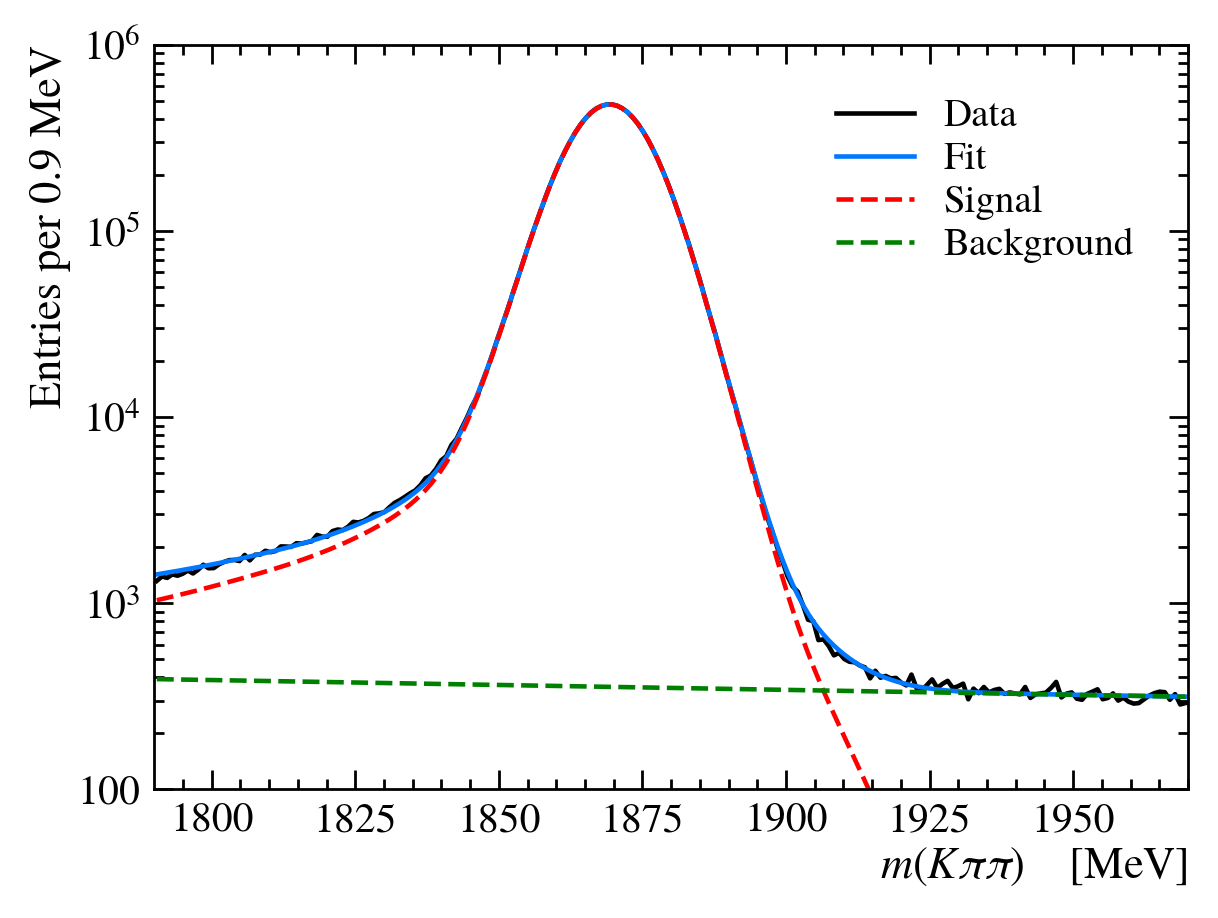

In [52]:
plt.plot(conv2.x, conv2.y, color='black', label='Data')
plt.plot(conv2.x,conv2.gen_y(conv2.x), label='Fit')
plt.plot(conv2.x,conv2.pdf[0].call(conv2.x)*0.9+conv2.pdf[1].call(conv2.x)*0.9+conv2.pdf[2].call(conv2.x)*0.9, linestyle='--',color='red', label='Signal')
plt.plot(conv2.x,conv2.pdf[-1].call(conv2.x)*0.9, linestyle='--',color='green', label='Background')
#plt.plot(tanh1.x,tanh1.gen_y(tanh1.x), color='red', label='$K\pi\pi$ convolution')
plt.yscale('log')
plt.axis([1790,1970, 100,10**6])
plt.xlabel('$m(K \pi \pi)$    [MeV]')
plt.ylabel('Entries per 0.9 MeV')
plt.legend()
plt.show()

In [31]:
from scipy.stats import crystalball
def CrystalBall(n,alpha,beta,mu,sigma):
    return fitlib.Fit_function(lambda x,n,a,b,m,s: n*crystalball.pdf(x,a,b,loc=m,scale=s),
                              [n,alpha,beta,mu,sigma])

In [42]:
crys1 = fitlib.Fitter.binned(Dp_M, range=(1790,1970), bins=200)
crys1.mu = fitlib.f(1840,1900)

crys1.pdf=[
    CrystalBall(alpha=(0.5,10), beta=(1,3,30), n=(0,10000,np.inf), mu=crys1.mu, sigma=(1,40)),
    fitlib.Normal(n=(0,10000,np.inf), mu=crys1.mu, sigma=(1,40)),
    
    fitlib.Exp(n=fitlib.f(0,10000,np.inf), x0=fitlib.f(1790), a=fitlib.f(0.0001,300,np.inf))
]

crys1.chi2(1000000)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2925                       │             Nfcn = 1387              │
│ EDM = 2.79e-05 (Goal: 0.0002)    │            time = 0.7 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │  4.00e6   │  0.07e6   │            │            │    0    │         │       │
│ 1 │ x1   │   1.840   │   0.012   │            │            │   0.5   │   10    │       │
│ 2 │ x2   │   2.55    │   0.06    │            │            │    1    │   30    │       │
│ 3 │ x3   │1.8692010e3│0.0000026e3│            │            │  1840   │  1900   │       │
│ 4 │ x4   │   9.59    │   0.03    │            │            │    1    │   40    │       │
│ 5 │ x5   │  6.01e6   │  0.07e6   │            │            │    0    │         │       │
│ 6 │ x6   │   6.500   │   0.017   │            │            │    1    │   40    │       │
│ 7 │ x7   │  164.8e3  │   1.0e3   │            │            │    0    │         │       │
│ 8 │ x8   │  1.790e3  │  0.018e3  │            │            │         │         │  yes  │
│ 9 │ x9   │   120.0   │    1.5    │            │            │ 0.0001  │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│    │            x0            x1            x2            x3            x4            x5            x6            x7            x8            x9 │
├────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ x0 │      4.67e+09     721.92346  -1.7357143e3      2.255343  -2.0079153e3          -5e9 -1.16142077e3         6.5e6           0e9     20.4612e3 │
│ x1 │     721.92346      0.000153      -0.57e-3         -4e-6      -0.28e-3    -707.72315      -0.19e-3      -1.08578             0       8.79e-3 │
│ x2 │  -1.7357143e3      -0.57e-3        0.0033         24e-6        0.5e-3   1.6254908e3       0.47e-3       21.6764        0.0000       -0.0674 │
│ x3 │      2.255343         -4e-6         24e-6      6.75e-06         -5e-6     -3.062181          1e-6    163.488e-3          0e-6       -398e-6 │
│ x4 │  -2.0079153e3      -0.28e-3        0.5e-3         -5e-6      0.000932   2.0042106e3       0.48e-3       -5.2012             0       -4.1e-3 │
│ x5 │          -5e9    -707.72315   1.6254908e3     -3.062181   2.0042106e3      4.62e+09  1.15267658e3        -7.7e6           0e9    -17.8473e3 │
│ x6 │ -1.16142077e3      -0.19e-3       0.47e-3          1e-6       0.48e-3  1.15267658e3      0.000301      -1.27700             0      -6.23e-3 │
│ x7 │         6.5e6      -1.08578       21.6764    163.488e-3       -5.2012        -7.7e6      -1.27700      9.74e+05           0e6        -215.0 │
│ x8 │           0e9             0        0.0000          0e-6             0           0e9             0           0e6             0           0.0 │
│ x9 │     20.4612e3      

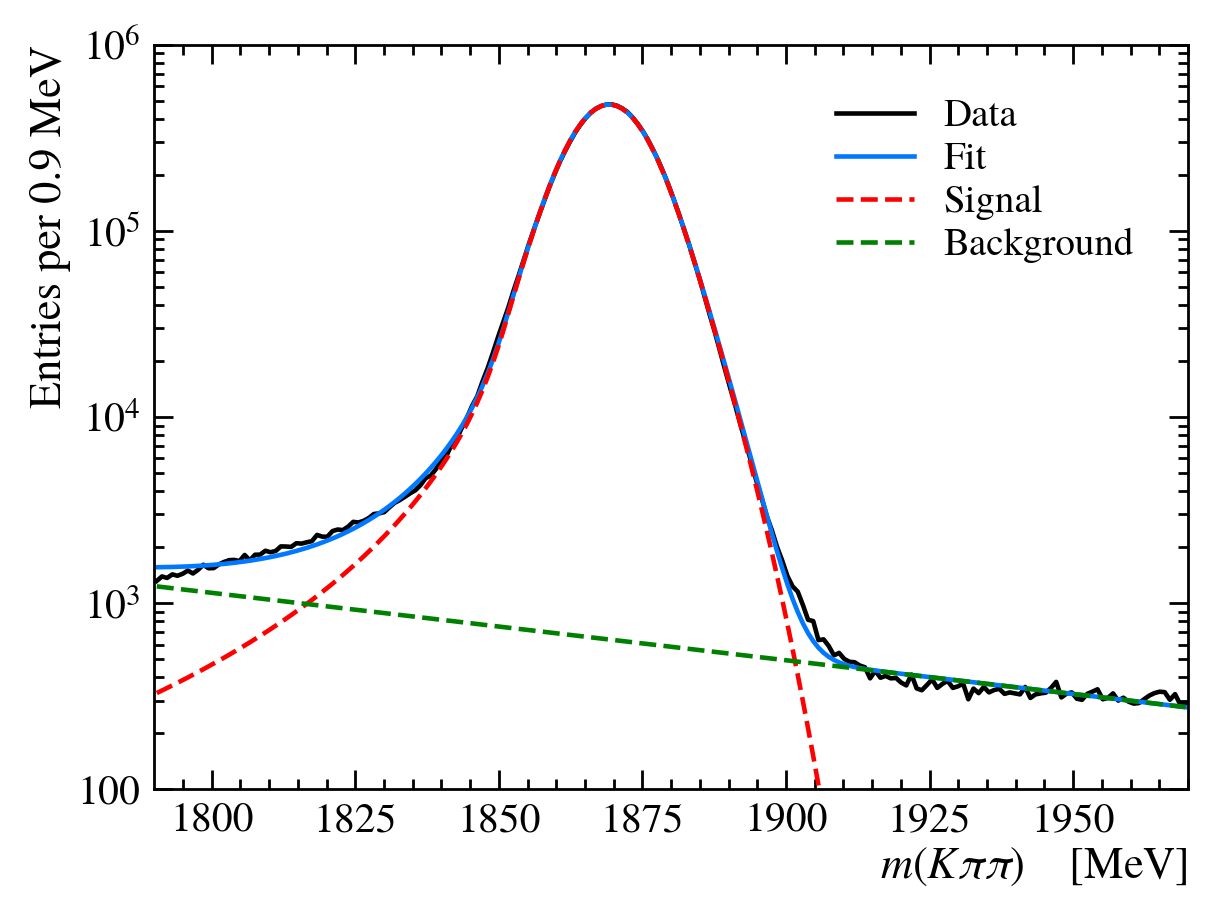

In [51]:
plt.plot(crys1.x, crys1.y, color='black', label='Data')
plt.plot(crys1.x,crys1.gen_y(crys1.x), label='Fit')
plt.plot(crys1.x,crys1.pdf[0].call(crys1.x)*0.9+crys1.pdf[1].call(crys1.x)*0.9, linestyle='--',color='red', label='Signal')
plt.plot(crys1.x,crys1.pdf[-1].call(crys1.x)*0.9, linestyle='--',color='green', label='Background')
#plt.plot(tanh1.x,tanh1.gen_y(tanh1.x), color='red', label='$K\pi\pi$ convolution')
plt.yscale('log')
plt.axis([1790,1970, 100,10**6])
plt.xlabel('$m(K \pi \pi)$    [MeV]')
plt.ylabel('Entries per 0.9 MeV')
plt.legend()
plt.show()

In [46]:
crys2 = fitlib.Fitter.binned(Dp_M, range=(1790,1970), bins=200)
crys2.mu = fitlib.f(1840,1900)

crys2.pdf=[
    CrystalBall(alpha=(0.5,10), beta=(1,3,30), n=(0,10000,np.inf), mu=crys2.mu, sigma=(1,40)),
    fitlib.Normal(n=(0,10000,np.inf), mu=crys2.mu, sigma=(1,40)),
    fitlib.Normal(n=(0,1000,np.inf), mu=crys2.mu, sigma=(1,40)),
    
    fitlib.Exp(n=fitlib.f(0,10000,np.inf), x0=fitlib.f(1790), a=fitlib.f(0.0001,300,np.inf))
]

crys2.chi2(1000000)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 803.1                      │             Nfcn = 27107             │
│ EDM = 1.76e-05 (Goal: 0.0002)    │           time = 14.8 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │   86e6    │    1e6    │            │            │    0    │         │       │
│ 1 │ x1   │   1.948   │   0.005   │            │            │   0.5   │   10    │       │
│ 2 │ x2   │ 1.001008  │ 0.000012  │            │            │    1    │   30    │       │
│ 3 │ x3   │1.8692707e3│0.0000026e3│            │            │  1840   │  1900   │       │
│ 4 │ x4   │   5.962   │   0.014   │            │            │    1    │   40    │       │
│ 5 │ x5   │  0.614e6  │  0.020e6  │            │            │    0    │         │       │
│ 6 │ x6   │   13.17   │   0.09    │            │            │    1    │   40    │       │
│ 7 │ x7   │  6.513e6  │  0.028e6  │            │            │    0    │         │       │
│ 8 │ x8   │   7.886   │   0.016   │            │            │    1    │   40    │       │
│ 9 │ x9   │  0.368e6  │  0.020e6  │            │            │    0    │         │       │
│ 10│ x10  │  1.790e3  │  0.018e3  │            │            │         │         │  yes  │
│ 11│ x11  │    820    │    50     │            │            │ 0.0001  │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│     │              x0              x1              x2              x3              x4              x5              x6              x7              x8              x9             x10             x11 │
├─────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│  x0 │        9.37e+11     -319.863336 -10.63217694560       98.896536      -173.20681          -0.2e9         161.435           0.4e9         9.91500           1.4e9               0        4.1799e6 │
│  x1 │     -319.863336        2.75e-05        -5.57e-9           -2e-6        0.033e-3      -41.646796        0.153e-3     -110.506087        0.054e-3      -10.455676               0      -29.422e-3 │
│  x2 │ -10.63217694560        -5.57e-9        1.39e-10         1.36e-9        -3.78e-9   -467.36607e-6        -5.41e-9  10.50121616e-3        -2.73e-9  18.05311235e-3               0     52.66847e-6 │
│  x3 │       98.896536           -2e-6         1.36e-9        6.81e-06           -6e-6       -2.087905            4e-6        9.162996            0e-6        3.333477            0e-6        9.933e-3 │
│  x4 │      -173.20681        0.033e-3        -3.78e-9           -6e-6        0.000193        56.64936        -0.22e-3      -250.46471        -0.03e-3         8.37266               0        22.16e-3 │
│  x5 │         

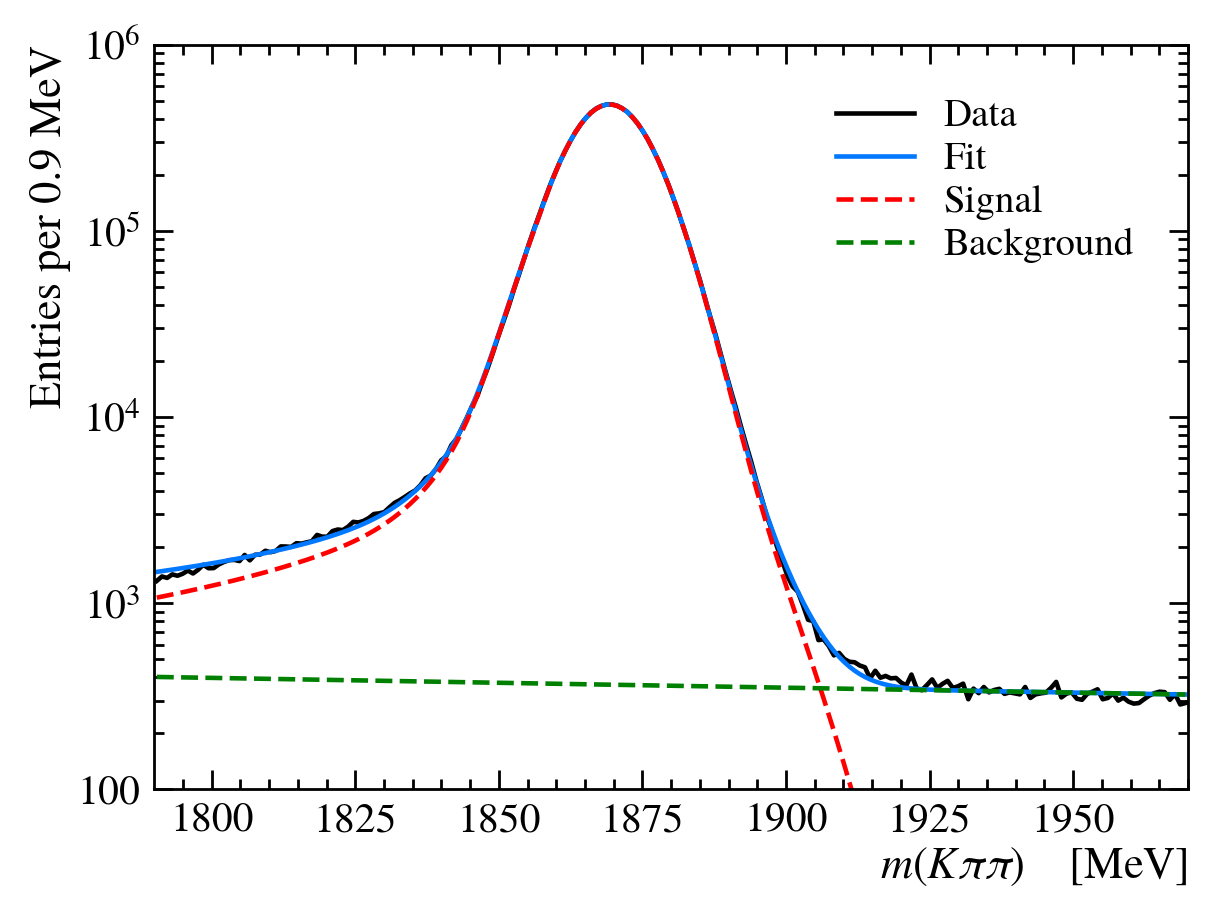

In [50]:
plt.plot(crys2.x, crys2.y, color='black', label='Data')
plt.plot(crys2.x,crys2.gen_y(crys2.x), label='Fit')
plt.plot(crys2.x,crys2.pdf[0].call(crys2.x)*0.9+crys2.pdf[1].call(crys2.x)*0.9+crys2.pdf[2].call(crys2.x)*0.9, linestyle='--',color='red', label='Signal')
plt.plot(crys2.x,crys2.pdf[-1].call(crys2.x)*0.9, linestyle='--',color='green', label='Background')
#plt.plot(tanh1.x,tanh1.gen_y(tanh1.x), color='red', label='$K\pi\pi$ convolution')
plt.yscale('log')
plt.axis([1790,1970, 100,10**6])
plt.xlabel('$m(K \pi \pi)$    [MeV]')
plt.ylabel('Entries per 0.9 MeV')
plt.legend()
plt.show()

In [49]:
fits = [crys1, crys2, conv_kkp, conv1, conv2]
for fit in fits:
    print(f" & {np.sum(~fit.minimizer.fixed)} & {fit.mu.value:.3f} ± {fit.mu.error:.3f} & {fit.minimizer.fval/(len(fit.x) - np.sum(~fit.minimizer.fixed)):.1f} \\\\")

 & 9 & 1869.201 ± 0.003 15.3 \\
 & 11 & 1869.271 ± 0.003 4.2 \\
 & 7 & 1869.294 ± 0.003 38.4 \\
 & 7 & 1870.394 ± 0.003 5.9 \\
 & 9 & 1870.394 ± 0.003 2.0 \\
